<a href="https://colab.research.google.com/github/damaral2005/Aplicadas_1_ongong/blob/main/Graficas_Laboratorio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto 1


Análisis para la función f1 = x/(x + 1)
Dominio excluye puntos: [-1]
Intersección con el eje X: [0]
Intersección con el eje Y: 0
Puntos críticos: []
Puntos de inflexión: []

Análisis para la función f2 = Piecewise((x*(3*x + 2), x >= 0), (0, True))
Dominio excluye puntos: []
No se puede calcular las intersecciones para esta función.
No se puede calcular los puntos críticos para esta función.
No se puede calcular los puntos de inflexión para esta función.

Análisis para la función f3 = x**2/(x**2 - 1)
Dominio excluye puntos: [-1, 1]
Intersección con el eje X: [0]
Intersección con el eje Y: 0
Puntos críticos: [0]
Puntos de inflexión: [-sqrt(3)*I/3, sqrt(3)*I/3]

Análisis para la función f4 = (5235*x**3 - 1245)/(7126*x - 3141)
Dominio excluye puntos: [3141/7126]
Intersección con el eje X: [349**(2/3)*83**(1/3)/349, -349**(2/3)*83**(1/3)/698 - sqrt(3)*349**(2/3)*83**(1/3)*I/698, -349**(2/3)*83**(1/3)/698 + sqrt(3)*349**(2/3)*83**(1/3)*I/698]
Intersección con el eje Y: 415/1047
Puntos críti

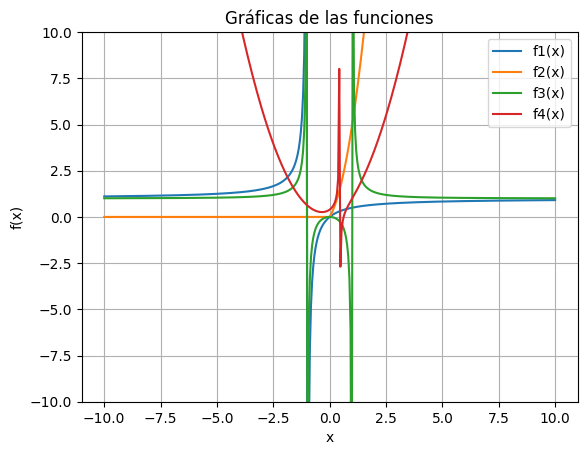

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Piecewise

# Definimos x como símbolo
x = symbols('x')

# Lista de funciones para analizar, usando Piecewise para la segunda función
functions = [
    x / (x + 1),
    Piecewise(((x + x) / 2 * (3 * x + 2), x >= 0), ((-x + x) / 2 * (3 * x + 2), x < 0)),
    x**2 / (x**2 - 1),
    (5235 * x**3 - 1245) / (7126 * x - 3141)
]

# Función para análisis y graficar
def analyze_and_plot(func, func_name):
    # Paso 1: Análisis inicial
    print(f"\nAnálisis para la función {func_name} = {func}")

    # Dominio (exclusiones)
    try:
        domain_exclusions = solve(1 / (func), x)
        print(f"Dominio excluye puntos: {domain_exclusions}")
    except NotImplementedError:
        print("No se puede calcular el dominio para esta función.")

    # Intersecciones con los ejes
    try:
        intercept_x = solve(func, x)
        intercept_y = func.subs(x, 0)
        print(f"Intersección con el eje X: {intercept_x}")
        print(f"Intersección con el eje Y: {intercept_y}")
    except NotImplementedError:
        print("No se puede calcular las intersecciones para esta función.")

    # Paso 2: Análisis con cálculo (puntos críticos y puntos de inflexión)
    # Primera derivada para puntos críticos y crecimiento/decrecimiento
    first_derivative = diff(func, x)
    try:
        critical_points = solve(first_derivative, x)
        print(f"Puntos críticos: {critical_points}")
    except NotImplementedError:
        print("No se puede calcular los puntos críticos para esta función.")

    # Segunda derivada para concavidad e inflexión
    second_derivative = diff(first_derivative, x)
    try:
        inflection_points = solve(second_derivative, x)
        print(f"Puntos de inflexión: {inflection_points}")
    except NotImplementedError:
        print("No se puede calcular los puntos de inflexión para esta función.")

    # Graficar en un rango finito sin calcular asíntotas en infinito
    x_vals = np.linspace(-10, 10, 400)  # Rango reducido de x para evitar discontinuidades
    y_vals = []

    # Evaluamos la función y evitamos los puntos de discontinuidad
    for val in x_vals:
        try:
            y = func.subs(x, val).evalf()
            # Asignamos NaN si el valor es infinitamente grande
            if abs(y) > 1e5:  # Ajusta este umbral según lo necesario
                y_vals.append(np.nan)
            else:
                y_vals.append(y)
        except (ZeroDivisionError, ValueError):
            y_vals.append(np.nan)  # Asigna NaN donde no se pueda evaluar

    # Graficamos solo los puntos válidos
    plt.plot(x_vals, y_vals, label=f"{func_name}(x)", lw=1.5)

# Generamos las gráficas
for i, func in enumerate(functions, start=1):
    analyze_and_plot(func, f"f{i}")

plt.legend()
plt.title("Gráficas de las funciones")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-10, 10)
plt.grid(True)
plt.show()



#Punto 2

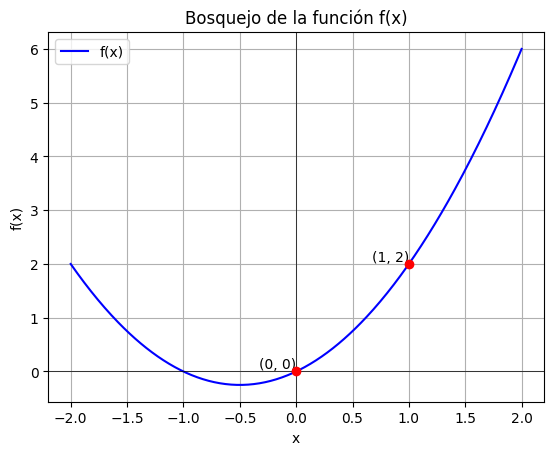

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x_vals = np.linspace(-2, 2, 400)

# Propuesta de función que cumpla las condiciones
def f(x):
    return x**2 + x

# Calcular los valores de y según la función
y_vals = f(x_vals)

# Graficar la función
plt.plot(x_vals, y_vals, label="f(x)", color="blue")

# Marcar puntos importantes
plt.scatter([0, 1], [f(0), f(1)], color="red", zorder=5)
plt.text(0, f(0), "(0, 0)", verticalalignment='bottom', horizontalalignment='right')
plt.text(1, f(1), "(1, 2)", verticalalignment='bottom', horizontalalignment='right')

# Configurar el gráfico
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Bosquejo de la función f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


#Punto 3

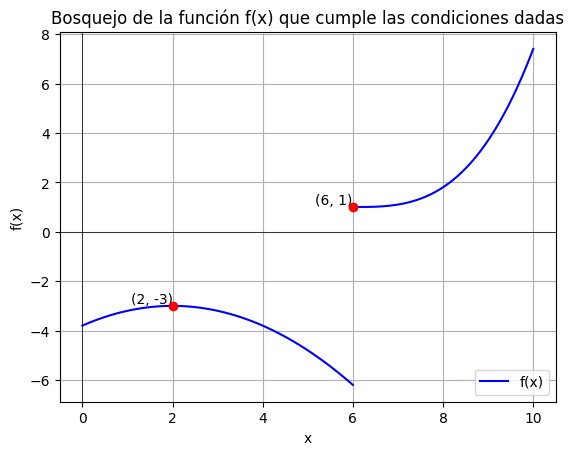

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función en dos secciones separadas
def f_left(x):
    return -0.2 * (x - 2)**2 - 3

def f_right(x):
    return 0.1 * (x - 6)**3 + 1

# Rango de valores de x para cada sección
x_vals_left = np.linspace(0, 6, 200)
x_vals_right = np.linspace(6, 10, 200)

# Calcular valores de y para cada tramo
y_vals_left = f_left(x_vals_left)
y_vals_right = f_right(x_vals_right)

# Crear la gráfica
plt.plot(x_vals_left, y_vals_left, label="f(x)", color="blue")
plt.plot(x_vals_right, y_vals_right, color="blue")

# Marcar puntos importantes
plt.scatter([2, 6], [f_left(2), f_right(6)], color="red", zorder=5)
plt.text(2, f_left(2), "(2, -3)", verticalalignment='bottom', horizontalalignment='right')
plt.text(6, f_right(6), "(6, 1)", verticalalignment='bottom', horizontalalignment='right')

# Configuración del gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Bosquejo de la función f(x) que cumple las condiciones dadas")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

